In [1]:
from PySections import *
import os

<h1>PUNTO 1</h1>

<h3>A</h3>

In [10]:
estructura = Estructura()
EI = 10000
EA = 65*EI
CONCRETO = Material('CONCRETO', 1, 0.2, 9.9*10**-6, 23.54)
SECCION = Seccion('ELEMENTOS', TipoSeccion.GENERAL, [EA,EI], CONCRETO)

estructura.agregarNodo(x=0,y=0,fix=[False,False,False])
estructura.agregarNodo(x=0,y=5)
estructura.agregarNodo(x=5,y=7)
estructura.agregarNodo(x=9,y=4)
estructura.agregarNodo(x=9,y=0,fix=[False,False,False])
estructura.agregarElemento(seccion=SECCION, nodoInicial=0, nodoFinal=1, tipo=Tipo.UNO, defCortante=False)
estructura.agregarElemento(seccion=SECCION, nodoInicial=1, nodoFinal=2, tipo=Tipo.UNO, defCortante=False)
estructura.agregarElemento(seccion=SECCION, nodoInicial=2, nodoFinal=3, tipo=Tipo.UNO, defCortante=False)
estructura.agregarElemento(seccion=SECCION, nodoInicial=3, nodoFinal=4, tipo=Tipo.UNO, defCortante=False)
estructura.agregarCargaNodo(nodo=1, px=10)
estructura.agregarCargaNodo(nodo=2, px=20)
estructura.agregarCargaNodo(nodo=3, px=20)
estructura.agregarCargaDistribuida(elemento=1,WY=50)
estructura.agregarCargaDistribuida(elemento=2,WY=40)
estructura.solucionar(verbose=True,dibujar=True,guardar=True,carpeta='PUNTO1_RESULTADOS')
print('La matriz de rigidez de la estructura se guardo como archivo csv en la carpeta PUNTO1_RESULTADOS en el mismo directorio donde se encuentra este archivo')

Se ha terminado de calcular, puedes examinar la variable de la estructura para consultar los resultados.
Se han guardado los resultados en: C:\Users\david\Desktop\Analisis Avanzado\Python/PUNTO1_RESULTADOS 
La matriz de rigidez de la estructura se guardo como archivo csv en la carpeta PUNTO1_RESULTADOS en el mismo directorio donde se encuentra este archivo


<h3>B y C</h3>

<h3>D</h3>

In [101]:
estructura = Estructura()
EI = 10000
EA = 65*EI
CONCRETO = Material('CONCRETO', 1, 0.2, 9.9*10**-6, 23.54)
SECCION = Seccion('ELEMENTOS', TipoSeccion.GENERAL, [EA*10**10,EI], CONCRETO)

estructura.agregarNodo(x=0,y=0,fix=[False,False,False])
estructura.agregarNodo(x=0,y=5)
estructura.agregarNodo(x=5,y=7)
estructura.agregarNodo(x=9,y=4)
estructura.agregarNodo(x=9,y=0,fix=[False,False,False])

estructura.agregarElemento(seccion=SECCION, nodoInicial=0, nodoFinal=1, tipo=Tipo.UNO, defCortante=False)
estructura.agregarElemento(seccion=SECCION, nodoInicial=1, nodoFinal=2, tipo=Tipo.UNO, defCortante=False)
estructura.agregarElemento(seccion=SECCION, nodoInicial=2, nodoFinal=3, tipo=Tipo.UNO, defCortante=False)
estructura.agregarElemento(seccion=SECCION, nodoInicial=3, nodoFinal=4, tipo=Tipo.UNO, defCortante=False)

estructura.agregarCargaNodo(nodo=1, px=10)
estructura.agregarCargaNodo(nodo=2, px=20)
estructura.agregarCargaNodo(nodo=3, px=20)

estructura.agregarCargaDistribuida(elemento=1,WY=50)
estructura.agregarCargaDistribuida(elemento=2,WY=40)

estructura.definirConstraint('ROD',2,3)
estructura.definirConstraint('ROD',1,2)
estructura.definirConstraint('ROD',0,4)

superElemento = estructura.hacerSuperElemento(gdlVisibles=[0,1],gdlInvisibles=[2,3,4,5])
KGorro = superElemento[1]
FGorro = superElemento[0]
estructura.solucionar(verbose=True,dibujar=False,guardar=True,carpeta='PUNTO1_RESULTADOS')
print('Matriz KGorrito: \n'+format(np.round(KGorro,3)))
print('Vector FGorrito: \n'+format(np.round(FGorro,3)))

Se ha terminado de calcular, puedes examinar la variable de la estructura para consultar los resultados.
Se han guardado los resultados en: C:\Users\david\Desktop\Analisis Avanzado\Python/PUNTO1_RESULTADOS 
Matriz KGorrito: 
[[ 2.73275e+03 -1.78000e+02]
 [-1.77938e+02  1.30000e+15]]
Vector FGorrito: 
[[-180.413]
 [-211.168]]


<h1>PUNTO 2</h1>

In [2]:
from PySections import *
estructura = Estructura()
EI = 105*10**3
EA = 50*EI
CONCRETO = Material('CONCRETO', 1, 0.2, 9.9*10**-6, 23.54)
SECCION = Seccion('ELEMENTOS', TipoSeccion.GENERAL, [EA,EI], CONCRETO)

estructura.agregarNodo(x=0,y=0,fix=[False,False,False])
r = 8
n = 4
h = r/n
estructura.agregarResorte(nodo=-1,rigidez=[1000,0,0])
for i in range(1,2*n):
    estructura.agregarNodo(x=i*h,y=(r**2-((i*h)-r)**2)**(1/2))
    estructura.agregarElemento(seccion=SECCION, nodoInicial=-2, nodoFinal=-1, tipo=Tipo.UNO, defCortante=False)
    estructura.agregarDefectoDeFabricacion(fi0=-1.2*10**-4)
estructura.agregarNodo(x=2*r,y=0,fix=[False,False,False])
estructura.agregarResorte(rigidez=[1000,0,0])
estructura.agregarElemento(seccion=SECCION, nodoInicial=-2, nodoFinal=-1, tipo=Tipo.UNO, defCortante=False)
estructura.agregarDefectoDeFabricacion(fi0=-1.2*10**-4)
superElemento = estructura.hacerSuperElemento(gdlVisibles=[0,1,2,18,19,2],gdlInvisibles=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
KGorro = superElemento[1]
FGorro = superElemento[0]
estructura.solucionar(verbose=False,dibujar=True,guardar=True,carpeta='PUNTO2_RESULTADOS_arco')
path = os.getcwd() + '/' + 'PUNTO2_RESULTADOS_arco' 
np.savetxt(path+"/KGorro.csv", KGorro, delimiter=",")
np.savetxt(path+"/FGorro.csv", FGorro, delimiter=",")

Se han guardado los resultados en: C:\Users\david\Desktop\Analisis Avanzado\Python/PUNTO2_RESULTADOS_arco 


In [3]:
estructura = Estructura()
EI = 105*10**3
EA = 50*EI
CONCRETO = Material('CONCRETO', 1, 0.2, 9.9*10**-6, 23.54)
SECCION = Seccion('ELEMENTOS', TipoSeccion.GENERAL, [EA,EI], CONCRETO)

estructura.agregarNodo(x=0,y=0,fix=[False,False,False])
estructura.agregarNodo(x=0,y=8)
estructura.agregarNodo(x=16,y=8)
estructura.agregarNodo(x=16,y=0,fix=[False,False,False])
estructura.agregarCargaNodo(nodo=2, px=-40,py=-55)
KCOLUMNA = np.array([[380109.19,0,-1773758,-380109,0,-1267116],[0,4615283,0,0,-4615283,0],[-1773758,0,9983464,1773758,0,4206600],[-380109,0,1773758,380109.19,0,1267115.6],[0,-4615283,0,0,4615283,0],[-1267115.6,0,4206600,1267116,0,5930324]])
FCOLUMNA = np.array([0,0,0,0,0,0]).reshape([6,1])
estructura.agregarSuperElementos(KGorro,FGorro,[0,1,2,3,4,5])
estructura.agregarSuperElementos(KCOLUMNA,FCOLUMNA,[6,7,8,0,1,2])
estructura.agregarSuperElementos(KCOLUMNA,FCOLUMNA,[9,10,11,3,4,5])
estructura.agregarElemento(seccion=SECCION, nodoInicial=0, nodoFinal=2, tipo=Tipo.DOS, defCortante=False)
estructura.solucionar(verbose=False,dibujar=True,guardar=True,carpeta='PUNTO2_RESULTADOS_ensamblado')
superElementoTOTAL = estructura.hacerSuperElemento(gdlVisibles=[3,4],gdlInvisibles=[0,1,2,5])
KGorroTOTAL = superElementoTOTAL[1]
FGorroTOTAL = superElementoTOTAL[0]
import os
path = os.getcwd() + '/' + 'PUNTO2_RESULTADOS_ensamblado'
np.savetxt(path+"/KGorro.csv", KGorroTOTAL, delimiter=",")
np.savetxt(path+"/FGorro.csv", FGorroTOTAL, delimiter=",")
print('Se guardo la matriz del resorte acoplado en lacarpeta: ' + 'PUNTO2_RESULTADOS_ensamblado')

Se han guardado los resultados en: C:\Users\david\Desktop\Analisis Avanzado\Python/PUNTO2_RESULTADOS_ensamblado 
Se guardo la matriz del resorte acoplado en lacarpeta: PUNTO2_RESULTADOS_ensamblado


Text(0, 0.5, 'Fuerza Axial [KN]')

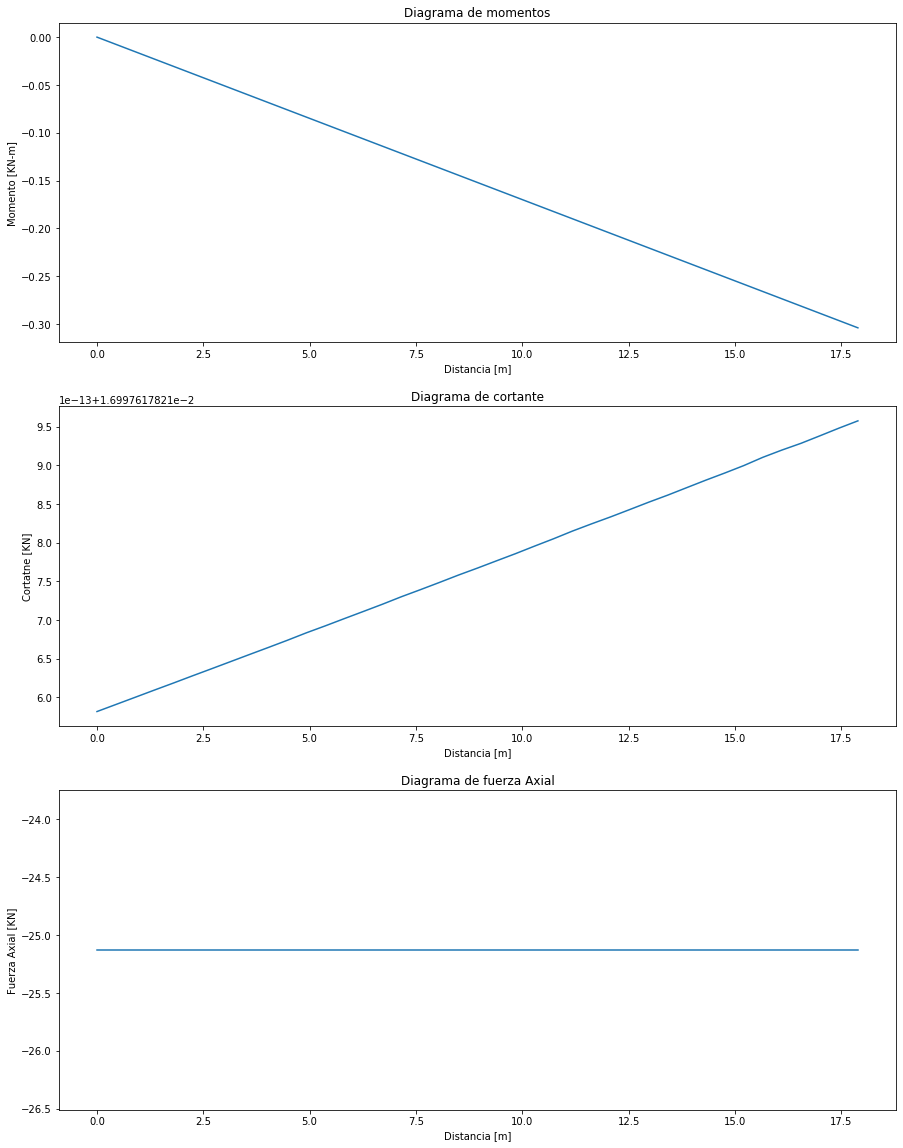

In [46]:
#FEM PARA DIAGRAMAS DE FUERZAS
#Funcion que evalua la funcion de interpolacion requerida
import matplotlib.pyplot as plt
def fi(x,param):
    i = param[0] #Reclasificacion de parametros para mejor lectura
    n = param[1]
    he = param[2]
    h = he/n #Encuentra el tamañode paso
    a = 'Parametros Incorrectos' #Valor por defectoen caso de un error en los parametros de entrada
    if i<=n:
        a = 1
        for j in range(0,n+1): #Itera sobre cada uno de 
            if not j == i: #Evalua que no ocurra division por 0 siguiendo el metodo de lagrange
                a = a*((x-j*h)/(i*h-j*h)) #Opera la formula multiplicatoria
    return a
def dndxfi(x,n,param,h=1/500):
    if n <= 0:
        return fi(x,param)
    else:
        return (dndxfi(x+h,n-1,param,h)-dndxfi(x-h,n-1,param,h))/(2*h)
def fiz(z,param):
    #Reclasificacion de parametros para mejor lectura
    i = param[0] #Numero de funcion de interpolación
    n = param[1] #Orden de interpolacion
    he = param[2] #Tamaño del elemento
    h = he/n #Encuentra el tamaño de paso
    x = (1+z)*(he/2)
    a = 'Parametros Incorrectos' #Valor por defecto en caso de un error en los parametros de entrada
    if i<=n: #Evalua la condicion de la multiplicatoria
        a = 1 #Se inicializa la variable en 1 para no alterar el valor de la multiplicatoria
        for j in range(0,n+1): #Itera sobre cada uno de los ordenes de interpolacion. En Python la funcion
            #range(xo,xf) itera desde x0 hasta xf-1, por tal razon se suma 1 en el ciclo
            if not j == i: #Evalua que no ocurra division por 0 siguiendo el metodo de lagrange
                a = a*((x-j*h)/(i*h-j*h)) #Opera la formula de la multiplicatoria
    return a #Retorna el valor de la funcion
def dndxfiz(x,n,param,h=1/500):
    if n <= 0: #Comprueba si el orden de diferenciacion es 0 para retornar el valor de la funcion
        return fiz(x,param) #Retorna el valor de la funcion
    else: #Recurre cambiando el orden de diferenciacion
        #Calcula diferencias finitas centradas de manera recursiva
        return (dndxfiz(x+h,n-1,param,h)-dndxfiz(x-h,n-1,param,h))/(2*h)
pesos = [0,0,0,0,0,0]
pesos[0] = [2]
pesos[1] = [1,1]
pesos[2] = [5/9,8/9,5/9]
pesos[3] = [(18+np.sqrt(30))/(36),(18+np.sqrt(30))/(36),(18-np.sqrt(30))/(36),(18-np.sqrt(30))/(36)]
pesos[4] = [(322+13*np.sqrt(70))/(900),(322+13*np.sqrt(70))/(900),128/225,(322-13*np.sqrt(70))/(900),(322-13*np.sqrt(70))/(900)]
pesos[5] = [0.4679139346,0.4679139346,0.3607615730,0.3607615730,0.1713244924,0.1713244924]

puntos = [0,0,0,0,0,0]
puntos[0] = [0]
puntos[1] = [-np.sqrt(1/3),np.sqrt(1/3)]
puntos[2] = [-np.sqrt(3/5),0,np.sqrt(3/5)]
puntos[3] = [-np.sqrt(3/7-2/7*np.sqrt(6/5)),np.sqrt(3/7-2/7*np.sqrt(6/5)),-np.sqrt(3/7+2/7*np.sqrt(6/5)),np.sqrt(3/7+2/7*np.sqrt(6/5))]
puntos[4] = [-1/3*np.sqrt(5-2*np.sqrt(10/7)),1/3*np.sqrt(5-2*np.sqrt(10/7)),0,-1/3*np.sqrt(5+2*np.sqrt(10/7)),1/3*np.sqrt(5+2*np.sqrt(10/7))]
puntos[5] = [0.2386191861,-0.2386191861,0.6612093865,-0.6612093865,0.9324695142,-0.9324695142]
def evaluarGauss(w,p,fx):
    return np.dot(np.array(w),fx(np.array(p)))
def integrarGauss(fx,n):
    return evaluarGauss(pesos[n-1],puntos[n-1],fx)
def ke(he,o,xa,h=1/500):
    def kij(i,j):
        fx = lambda z: (a(x(z,he,xa))*(dndxfiz(z,1,[i,o,he],h))*(dndxfiz(z,1,[j,o,he],h))*(2/he)*(2/he)+c(x(z,he,xa))*fiz(z,[i,o,he])*fiz(z,[j,o,he]))*he/2
        return integrarGauss(fx,puntosGauss),fx
    k = np.zeros([o+1,o+1])
    for i in range(0,o+1):
        for j in range(0,o+1):
            k[i][j]=kij(i,j)[0]
    return k
def fe(he,o,xa,h=1/500):
    def fi(i):
        fx = lambda z: (f(x(z,he,xa))*fiz(z,[i,o,he]))*he/2
        return integrarGauss(fx,puntosGauss),fx
    fvect = np.zeros([o+1,1])
    for i in range(0,o+1):
        fvect[i]=fi(i)[0]
    return fvect
class ElementoFEM:
    def __init__(this,he,gdl,xa,h):
        this.he = he
        this.Ke = ke(he,ordenAproximacion,xa,h)
        this.gdl = gdl
        this.Fe = fe(he,ordenAproximacion,xa,h)
        this.xa = xa
    def postProcesar(this,U):
        this.Ue = U[this.gdl]
        this.Qe = np.dot(this.Ke,this.Ue)-this.Fe
        return this.Qe
class FEM1D:
    def __init__(this,config):
        this.config = config
        this.establecerParametros(this.config)
    def establecerParametros(this,config):
        this.config = config
        this.numeroElementos = config['numeroElementos']
        this.ordenAproximacion = config['ordenAproximacion']
        this.puntosGauss = config['puntosGauss']
    def definirCondicionesDeFrontera(this,cbe,cbn):
        this.cbe = cbe
        this.cbn = cbn
ordenAproximacion = 2
puntosGauss = 3
a = lambda x: 1
c = lambda x: 0
f = lambda x: 0
x = lambda z,xa,he: xa + he/2*(1+z)
elemento = estructura.elementos[0]
longitud = elemento.Longitud
numeroElementos = 40
he = longitud/numeroElementos
ordenAproximacion = 2
tamaño = (ordenAproximacion)*(numeroElementos)+1
elementos = np.array([])
K = np.zeros([tamaño,tamaño])
K1 = np.zeros([tamaño,tamaño])
F = np.zeros([tamaño,1])
Q = np.zeros([tamaño,1])
cbe = [[0,-estructura.elementos[0].p[2]],[-1,-estructura.elementos[0].p[5]]]
cbn = []
S = np.zeros([tamaño,1])
for i in range(0,numeroElementos):
    xa = i*he
    elementos = np.append(elementos,ElementoFEM(he,np.arange(i*ordenAproximacion,(i+1)*ordenAproximacion+1,1),xa,1/10000))
    Ki = np.zeros([tamaño,tamaño])
    Ki[i*ordenAproximacion:(i+1)*ordenAproximacion+1:1,i*ordenAproximacion:(i+1)*ordenAproximacion+1:1] = elementos[i].Ke
    K = K + Ki
    K1 = K1 + Ki
    Fi = np.zeros([tamaño,1])
    Fi[i*ordenAproximacion:(i+1)*ordenAproximacion+1:1] = elementos[i].Fe
    F = F + Fi
for i in cbn:
    Q[i[0]] = i[1]
for i in cbe:
    ui = np.zeros([tamaño,1])
    ui[i[0]] = i[1]
    vv = np.dot(K1,ui)
    S = S - vv
    K1[i[0],:] = 0
    K1[:,i[0]] = 0
    K1[i[0],i[0]] = 1
S = S + F + Q
for i in cbe:
    S[i[0]] = i[1]
U = np.dot(np.linalg.inv(K1),S)
Q = np.dot(K,U) - F

QGeneral = np.array([])
for i in range(0,numeroElementos):
    QGeneral = np.append(QGeneral,elementos[i].postProcesar(U)[0])
QGeneral = np.append(QGeneral,-Q[-1])
fig,axes =  plt.subplots(3,figsize=(15,20))
axes[0].plot(np.arange(0,longitud+he/2,he/2),U)
axes[0].set_title('Diagrama de momentos')
axes[0].set_xlabel('Distancia [m]')
axes[0].set_ylabel('Momento [KN-m]')
axes[1].plot(np.arange(0,longitud+he,he),QGeneral)
axes[1].set_title('Diagrama de cortante')
axes[1].set_xlabel('Distancia [m]')
axes[1].set_ylabel('Cortatne [KN]')

axes[2].plot([0,longitud],[-estructura.elementos[0].p[0],estructura.elementos[0].p[3]])
axes[2].set_title('Diagrama de fuerza Axial')
axes[2].set_xlabel('Distancia [m]')
axes[2].set_ylabel('Fuerza Axial [KN]')

<h1>Punto 3</h1>

In [4]:
CONCRETO = Material('CONCRETO', 20000000, 0.2, 9.9*10**-6, 23.54)
factorVigas = 0.35
factorColumnas = 0.7
SECCIONVIGAS =Seccion('ELEMENTOS2', TipoSeccion.GENERAL, [10*10**20,factorVigas*0.3*0.75**3/12], CONCRETO)
SECCIONCOLUMNAS = Seccion('ELEMENTOS2', TipoSeccion.GENERAL, [10*10**20,factorColumnas*0.3*1.2**3/12], CONCRETO)

<h3>a</h3>

In [5]:
estructuraa = Estructura()
estructuraa.agregarNodo(x=0,y=0,fix=[False,False,False])
estructuraa.agregarNodo(x=10,y=0,fix=[False,False,False])

estructuraa.agregarNodo(x=0,y=5)
estructuraa.agregarNodo(x=10,y=5)
estructuraa.agregarNodo(x=0,y=10)
estructuraa.agregarNodo(x=10,y=10)

estructuraa.agregarElemento(seccion=SECCIONVIGAS, nodoInicial=2, nodoFinal=3, tipo=Tipo.UNO,defCortante=False)
estructuraa.agregarElemento(seccion=SECCIONVIGAS, nodoInicial=4, nodoFinal=5, tipo=Tipo.UNO,defCortante=False)
estructuraa.agregarElemento(seccion=SECCIONCOLUMNAS, nodoInicial=0, nodoFinal=2, tipo=Tipo.UNO,defCortante=False)
estructuraa.agregarElemento(seccion=SECCIONCOLUMNAS, nodoInicial=2, nodoFinal=4, tipo=Tipo.UNO,defCortante=False)
estructuraa.agregarElemento(seccion=SECCIONCOLUMNAS, nodoInicial=1, nodoFinal=3, tipo=Tipo.UNO,defCortante=False)
estructuraa.agregarElemento(seccion=SECCIONCOLUMNAS, nodoInicial=3, nodoFinal=5, tipo=Tipo.UNO,defCortante=False)

estructuraa.agregarCargaNodo(nodo=2, px=450)
estructuraa.agregarCargaNodo(nodo=4, px=900)
estructuraa.solucionar(verbose=False,dibujar=True,guardar=True,carpeta='PUNTO3A_RESULTADOS')
derivasa = estructuraa.Ul[np.ix_([1,6])]/5*100

Se han guardado los resultados en: C:\Users\david\Desktop\Analisis Avanzado\Python/PUNTO3A_RESULTADOS 


<h3>b</h3>

In [6]:
estructurab = Estructura()
estructurab.agregarNodo(x=0,y=0,fix=[False,False,False])
estructurab.agregarNodo(x=10,y=0,fix=[False,False,False])

estructurab.agregarNodo(x=0,y=5)
estructurab.agregarNodo(x=10,y=5)
estructurab.agregarNodo(x=0,y=10)
estructurab.agregarNodo(x=10,y=10)

estructurab.agregarElemento(seccion=SECCIONVIGAS, nodoInicial=2, nodoFinal=3, tipo=Tipo.UNO,apoyoIzquierdo=1.2,za=0.5,apoyoDerecho=1.2,zb=0.5)
estructurab.agregarElemento(seccion=SECCIONVIGAS, nodoInicial=4, nodoFinal=5, tipo=Tipo.UNO,apoyoIzquierdo=1.2,za=0.5,apoyoDerecho=1.2,zb=0.5)
estructurab.agregarElemento(seccion=SECCIONCOLUMNAS, nodoInicial=0, nodoFinal=2, tipo=Tipo.UNO,apoyoIzquierdo=0,za=0,apoyoDerecho=0.75,zb=0.5)
estructurab.agregarElemento(seccion=SECCIONCOLUMNAS, nodoInicial=2, nodoFinal=4, tipo=Tipo.UNO,apoyoIzquierdo=0.75,za=0.5,apoyoDerecho=0.75,zb=0.5)
estructurab.agregarElemento(seccion=SECCIONCOLUMNAS, nodoInicial=1, nodoFinal=3, tipo=Tipo.UNO,apoyoIzquierdo=0,za=0,apoyoDerecho=0.75,zb=0.5)
estructurab.agregarElemento(seccion=SECCIONCOLUMNAS, nodoInicial=3, nodoFinal=5, tipo=Tipo.UNO,apoyoIzquierdo=0.75,za=0.5,apoyoDerecho=0.75,zb=0.5)

estructurab.agregarCargaNodo(nodo=2, px=450)
estructurab.agregarCargaNodo(nodo=4, px=900)
estructurab.solucionar(verbose=False,dibujar=True,guardar=True,carpeta='PUNTO3B_RESULTADOS')
derivasb = estructurab.Ul[np.ix_([1,6])]/5*100

Se han guardado los resultados en: C:\Users\david\Desktop\Analisis Avanzado\Python/PUNTO3B_RESULTADOS 


<h3>c</h3>

In [7]:
#Porcentaje de error
#Desplazamientos
error=(estructuraa.Ul - estructurab.Ul)/estructurab.Ul
print('Error por desplazamiento[%]: \n'+format(np.round(error,3)))

Error por desplazamiento[%]: 
[[ 2.51400000e+00]
 [ 2.51400000e+00]
 [-1.66400000e+00]
 [ 2.51400000e+00]
 [ 2.51400000e+00]
 [-1.71100000e+00]
 [-6.81218340e+05]
 [-6.77857082e+05]
 [ 5.19500000e+00]
 [-6.81218340e+05]
 [-6.84613098e+05]
 [ 5.13000000e+00]]


In [8]:
#Porcentaje de error
#Reacciones
error=(estructuraa.Rn - estructurab.Rn)/estructurab.Rn
print('Error por reacciones[%]: \n'+format(np.round(error,3)))

Error por reacciones[%]: 
[[2.545]
 [4.565]
 [2.563]
 [2.491]
 [4.565]
 [2.526]]


In [9]:
#Porcentaje de error
#Derivas
error=(derivasa - derivasb)/derivasb
print('Error en derivas: \n'+format(np.round(error,3)))

Error en derivas: 
[[ 2.5140000e+00]
 [-6.8121834e+05]]
